In [1]:
#Importing Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report
from tqdm import tqdm
from time import time
import copy as cp
import tensorflow as tf

In [2]:
#Function to add Bias to the dataset
def add_ones(data):
    new_data=np.zeros([data.shape[0],data.shape[1]+1])
    new_data[:,0]=np.ones(data.shape[0])
    new_data[:,1:]=data 
    return new_data

In [3]:
#Importing the MNIST Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(x_train.shape[0],-1)
x_train=add_ones(x_train).T
x_test=x_test.reshape(x_test.shape[0],-1)
x_test=add_ones(x_test).T

y_train=y_train.reshape(y_train.shape[0],-1).T
y_test=y_test.reshape(y_test.shape[0],-1).T

Using TensorFlow backend.


In [4]:
#Normalising Data
x_train=x_train/255
x_test=x_test/255

In [5]:
def sigmoid(a):
    return (1/(1+np.exp(-a)))

In [6]:
def calc_cost(m,Y,A):
    return -(1/m)*np.sum(Y*(np.log(A))+(1-Y)*(np.log(1-A)))

In [7]:
def calc_weights(w,X):
    A = sigmoid(np.dot(w.T,X))
    return A

In [8]:
def update_weights(m,A,X,Y):
    dw=(1/m)*np.dot(X,(A-Y).T)
    dw=dw
    return dw

In [9]:
def gradient_descent(w, X, Y, num_iterations, learning_rate):
    costs=[]
    m=X.shape[1]
    for i in range(num_iterations):
        #Forward Propogation
        A=calc_weights(w,X)
        cost=calc_cost(m,Y,A)
        
        #Update Weights
        dw=update_weights(m,A,X,Y)
        w=w-learning_rate*dw
        
        #Save Cost each Iteration
        costs.append(cost)
    return w,dw,costs

In [10]:
def prediction(weights, X, Y):
    m=X.shape[1]
    classval=np.zeros((len(weights),m))
    for i, (k, w) in enumerate(weights.items()):
        A=np.dot(w.T,X)
        classval[k,:]=A
    classval=classval.T
    predict=np.argmax(classval,axis=1)
    Y_prediction = np.zeros((1,m))
    
    count=0
    for i in range(1,m):
        if Y[0][i]==predict[i]:
            count+=1
    
        
        ### END CODE HERE ###
    return (count/m)*100

In [20]:
def logistic_regression(X_train, Y_train, X_test, Y_test, learning_rate=0.005,num_iterations=100):
    
    X_train=X_train*0.0001
    X_test=X_test*0.0001
    class_list=np.unique(Y_train[0])
    weights={}
    
    label_matrix=np.zeros([X_train.shape[0]+1,X_train.shape[1]])
    label_matrix[:-1,:]=X_train
    label_matrix[-1,:]=Y_train
    
    classval=np.zeros((len(class_list),X_train.shape[1]))
    for c in class_list:
        w = np.zeros([X_train.shape[0],1])
        new_data=add_label(label_matrix.T,c)
        X_train_c=new_data[:,:-1].T
        Y_train_c=new_data[:,-1].T
        w, dw, costs = gradient_descent(w,X_train_c, Y_train_c, num_iterations, learning_rate)
        weights[c]=w
        
    train_accuracy = prediction(weights, X_train, Y_train)
    test_accuracy = prediction(weights, X_test, Y_test)
    
    return train_accuracy,test_accuracy,costs

In [21]:
def add_label(data,val):
    new_data=np.zeros([data.shape[0],data.shape[1]])
    #new_data[:,0]=np.ones(data.shape[0])
    new_data[:,:-1]=data[:,:-1]
    label=data[:,-1]

    for i in range(len(label)):
        l=label[i]
        if l==val:
            new_data[i][-1]=1
        else:
            new_data[i][-1]=-1

    return new_data


In [22]:
train_accuracy,test_accuracy,costs=logistic_regression(x_train, y_train, x_test, y_test)

In [23]:
print('The Accuracy on the Training Dataset is'+str(train_accuracy))

67.17833333333333

In [24]:
print('The Accuracy on the Testing Dataset is'+str(test_accuracy))

68.03

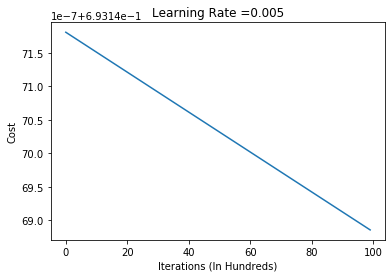

In [25]:
#Plotting the Cost for each Iteration
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (In Hundreds)')
plt.title("Learning Rate =0.005")
plt.show()